In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
usage_data = pd.read_csv("usage_data.csv")

usage_data.head()

,Date,Username,Feature,Sessions,Time spent,Average time spent
0,2017-06-01,kwalter,Reporting,14,23.0,1.642857
1,2017-06-01,kcarr,Roadmap,17,55.0,3.235294
2,2017-06-01,cstuart,Automation,13,2.0,0.153846
3,2017-06-01,mkelley,Task Creation,14,18.0,1.285714
4,2017-06-02,edillon,Task Creation,17,13.0,0.764706


In [15]:
usage_data['Year'] = usage_data['Date'].dt.year
usage_data['Month'] = usage_data['Date'].dt.month

usage_data.head()

,Date,Username,Feature,Sessions,Time spent,Average time spent,Year,Month
0,2017-06-01,kwalter,Reporting,14,23.0,1.642857,2017,6
1,2017-06-01,kcarr,Roadmap,17,55.0,3.235294,2017,6
2,2017-06-01,cstuart,Automation,13,2.0,0.153846,2017,6
3,2017-06-01,mkelley,Task Creation,14,18.0,1.285714,2017,6
4,2017-06-02,edillon,Task Creation,17,13.0,0.764706,2017,6


In [16]:
january_data = usage_data[usage_data['Month'] == 1]

january_data.head()

,Date,Username,Feature,Sessions,Time spent,Average time spent,Year,Month
1071,2018-01-01,qwyatt,Account Managment,13,11.0,0.846154,2018,1
1072,2018-01-01,mmayer,Reporting,16,15.0,0.937500,2018,1
1073,2018-01-01,nlane,Roadmap,14,60.0,4.285714,2018,1
1074,2018-01-01,aosborn,Automation,14,3.0,0.214286,2018,1
1075,2018-01-01,alara,Task Creation,13,21.0,1.615385,2018,1


In [19]:
january_usage_summary = january_data.groupby('Year')['Time spent'].sum().reset_index()

january_usage_summary.head()

,Year,Time spent
0,2018,3907.0
1,2019,3977.0
2,2020,3969.0
3,2021,4058.0
4,2022,3926.0


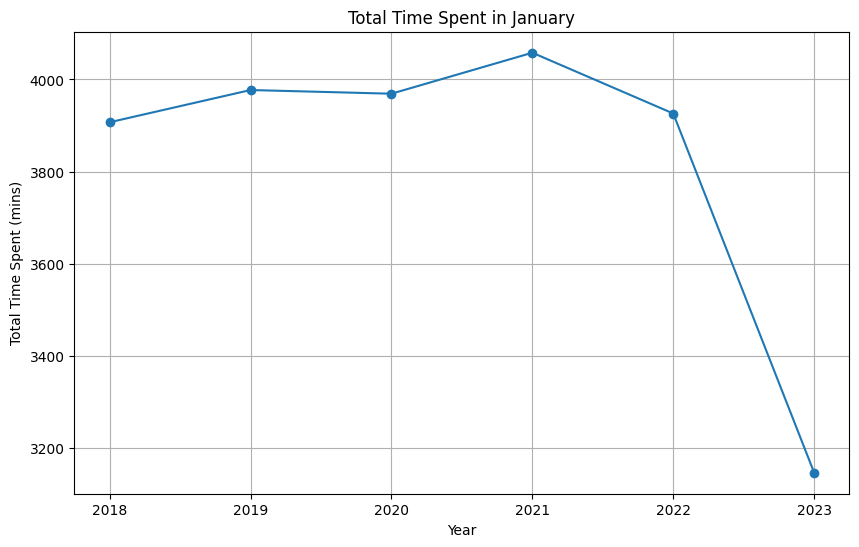

In [20]:
#Plotting the total time spent in january each year
plt.figure(figsize=(10, 6))
plt.plot(january_usage_summary['Year'], january_usage_summary['Time spent'], marker='o')
plt.title('Total Time Spent in January')
plt.xlabel('Year')
plt.ylabel('Total Time Spent (mins)')
plt.grid(True)
plt.xticks(january_usage_summary['Year'])

plt.savefig('total_time_spent_january.png', format='png', dpi=300)

plt.show()

In [22]:
# Group by 'Feature' and 'Year', and sum the 'Time spent' for each group
grouped_data = january_data.groupby(['Feature', 'Year'])['Time spent'].sum().unstack()

grouped_data.head()

Year,2018,2019,2020,2021,2022,2023
Feature,,,,,,
Account Managment,405.0,455.0,451.0,435.0,458.0,354.0
Automation,287.0,307.0,313.0,288.0,253.0,233.0
Reporting,676.0,680.0,671.0,614.0,705.0,605.0
Roadmap,1285.0,1370.0,1295.0,1509.0,1291.0,716.0
Saga Creation,652.0,675.0,751.0,647.0,703.0,670.0


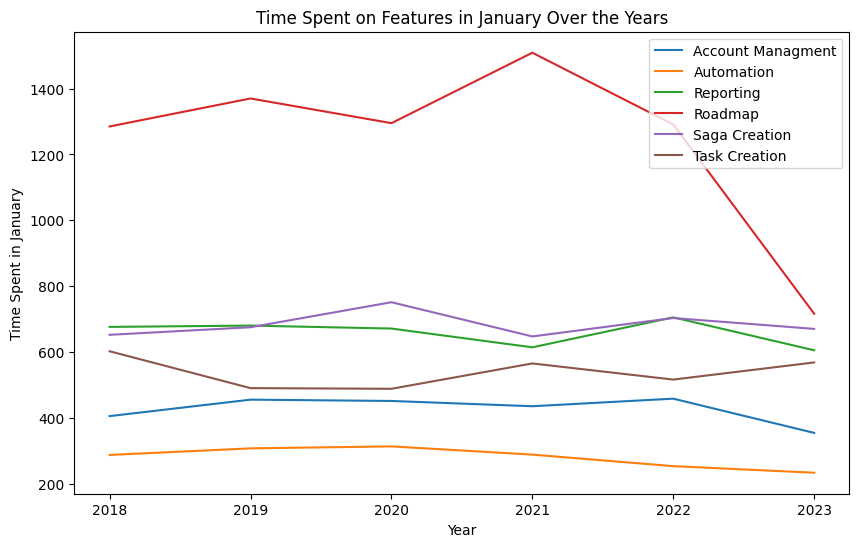

In [28]:
# Plotting
plt.figure(figsize=(10, 6))

for feature in grouped_data.index:
    plt.plot(grouped_data.columns, grouped_data.loc[feature], label=feature)

plt.xlabel('Year')
plt.ylabel('Time Spent in January')
plt.title('Time Spent on Features in January Over the Years')
plt.legend()

plt.savefig('total_time_spent_january_each_feature.png', format='png', dpi=300)

plt.show()